In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.tri as mtri


# Al finalizar el taller uds sabrán:
* Gradient descent
* Learning rate
* Activation function
* Epochs
* Cost/Loss function
* TensorFlow

In [2]:
def problema(x,w,b):
  return np.dot(x,w)+b

def sigmoide(x):
  return 1/ ( 1 + np.exp(-x))

def costo(y,Y):
  return (y - Y)**2

def dCdW(y,Y):
  return 2*(y-Y)*(y)*(1-y)

def punto(x,w,b,Y):
  y = sigmoide(problema(x,w,b))
  C = costo(y,Y)
  return C

In [3]:
epochs = 20
x      = [5,2]
w      = [0,-1]
LR     = 1
Y      = 0.71
b      = 0

P_h    = []


for epoch in range(epochs):
  y = sigmoide(problema(x,w,b))
  C = costo(y,Y)
  P_h.append([w[0],w[1],C])
  correcion =  dCdW(y,Y)*LR
  w = w - correcion

P_h = np.array(P_h)


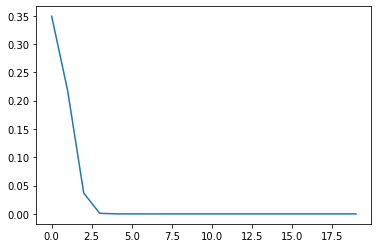

In [4]:
plt.plot(P_h[:,2])

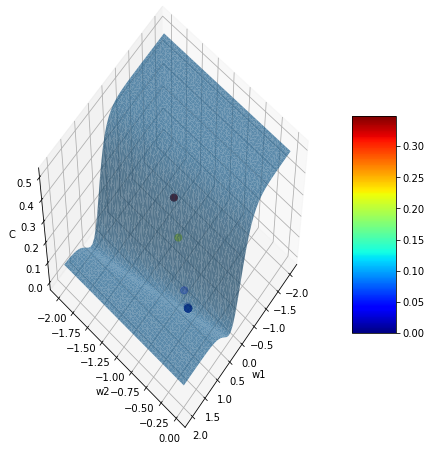

In [5]:
L = 50
w1 = np.linspace(-2,2,L)
w2 = np.linspace(-2,0,L)
x1 = 5
x2 = 2

S = []
for W1 in w1:
  for W2 in w2:
    P = punto([x1,x2],[W1,W2],b=0,Y=0.71)
    S.append([W1,W2,P])

S = np.array(S)




fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(1, 2, 1, projection='3d')

ax.set_xlabel('w1')
ax.set_ylabel('w2')
ax.set_zlabel('C')


tri = mtri.Triangulation(S[:,0], S[:,1])
ax.plot_trisurf(S[:,0],S[:,1],S[:,2],triangles=tri.triangles,alpha=0.7)

puntos = ax.scatter(P_h[:,0],P_h[:,1],P_h[:,2],c=P_h[:,2],cmap="jet",s=50)
fig.colorbar(puntos, shrink=0.5, aspect=5)    

ax.view_init(60,40)
plt.show()

In [6]:
def resuelve_grafique(x,w,b,Y,epochs,LR):
  # epochs = 20
  # x      = [5,2]
  # w      = [0,-1]
  # LR     = 1
  # Y      = 0.71
  # b      = 0
  P_h    = []
  for epoch in range(epochs):
    y = sigmoide(problema(x,w,b))
    C = costo(y,Y)
    P_h.append([w[0],w[1],C])
    correcion =  dCdW(y,Y)*LR
    w = w - correcion

  print("w =",w)
  print("C =",C)
  print("y =",y)
  P_h = np.array(P_h)
  L = 50
  w1 = np.linspace(-2,2,L)
  w2 = np.linspace(-2,0,L)
  x1 = x[0]
  x2 = x[1]

  S = []
  for W1 in w1:
    for W2 in w2:
      P = punto([x1,x2],[W1,W2],b=0,Y=0.71)
      S.append([W1,W2,P])

  S = np.array(S)
  fig = plt.figure(figsize=(16,8))
  ax = fig.add_subplot(1, 2, 1, projection='3d')

  ax.set_xlabel('w1')
  ax.set_ylabel('w2')
  ax.set_zlabel('C')


  tri = mtri.Triangulation(S[:,0], S[:,1])
  ax.plot_trisurf(S[:,0],S[:,1],S[:,2],triangles=tri.triangles,alpha=0.7)

  puntos = ax.scatter(P_h[:,0],P_h[:,1],P_h[:,2],c=P_h[:,2],cmap="jet",s=50)
  fig.colorbar(puntos, shrink=0.5, aspect=5)    

  ax.view_init(0,100)
  plt.show()


w = [-1.  -0.5]
C = 0.5028071373182299
y = 0.0009110511944006454


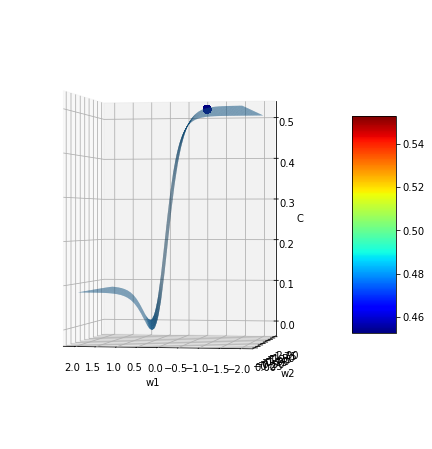

In [7]:
resuelve_grafique(x=[5,2],w=[-1,-0.5],b=-1,Y=0.71,epochs=200,LR=0.)

w = [-0.98006266  0.01993734]
C = 0.49332230682447153
y = 0.007630932611300383


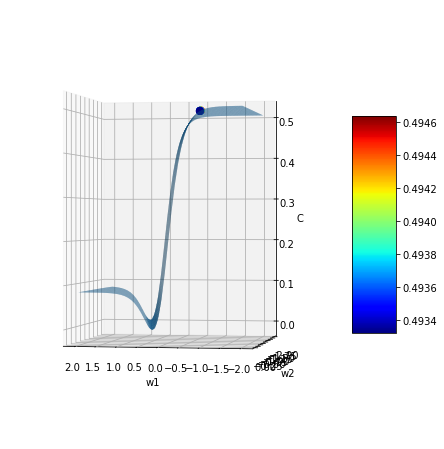

In [8]:
resuelve_grafique(x=[5,2],w=[-1,0],b=0,Y=0.71,epochs=20,LR=0.1)

w = [-0.18637371  0.91362629]
C = 0.0
y = 0.71


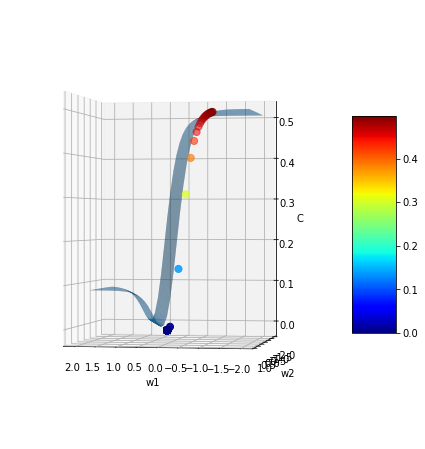

In [9]:
resuelve_grafique(x=[5,2],w=[-1.1,0],b=0,Y=0.71,epochs=200,LR=1)

In [10]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers



In [11]:
x_train = np.array([[5,2]])
y_train = np.array([[0.71]])

In [12]:
model = keras.Sequential()
model.add(keras.Input(shape=2))
model.add(layers.Dense(1,activation="sigmoid"))
model.compile(loss="MSE",optimizer=keras.optimizers.SGD(lr=.2))

modelo = model.fit(x_train,y_train,epochs=40,verbose=0)

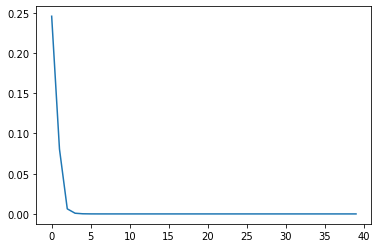

In [13]:
plt.plot(modelo.history["loss"])

In [14]:
X = np.array([[5,2]])
model.predict(X)
model.weights

[<tf.Variable 'dense/kernel:0' shape=(2, 1) dtype=float32, numpy=
 array([[ 0.3373178 ],
        [-0.43218517]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([0.07316546], dtype=float32)>]

w = [-0.18637371  0.91362629]
C = 1.232595164407831e-32
y = 0.7099999999999999


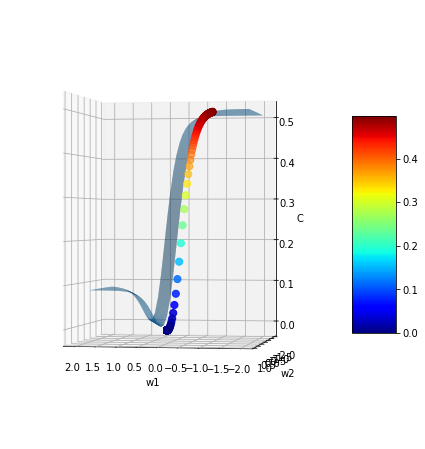

In [15]:
resuelve_grafique(x=[5,2],w=[-1.1,0],b=0,Y=0.71,epochs=1000000,LR=.2)